In [1]:
#Librerías
import os
import tabula
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get the current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: c:\Users\Usuario\Documents\Entrega_ML\notebooks


In [3]:
# Change the current working directory
os.chdir(r'C:\Users\Usuario\Documents\Entrega_ML\data\raw') 

In [4]:
# Double Check
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: C:\Users\Usuario\Documents\Entrega_ML\data\raw


In [5]:
# Creat a List of every document we want to use in our DataSet
path = cwd

contenido = os.listdir(path)
documentos = []

for fichero in contenido:
    if os.path.isfile(os.path.join(path, fichero)) and fichero.endswith('.pdf'):
        documentos.append(fichero)
print(documentos)

['100770.pdf', '100780.pdf', '103506.pdf', '112197.pdf', '11664B.pdf', '116765.pdf', '1364.pdf', '21443.pdf', '21756.pdf', '26902.pdf', '27100.pdf', '30085.pdf', '30088.pdf', '4679956.pdf', '51150.pdf', '51453.pdf', '53413.pdf', '60645.pdf', '61606.pdf', '61622.pdf', '61755.pdf', '61936.pdf', '61948.pdf', '62388.pdf', '62472.pdf', '62476.pdf', '69166.pdf', '69514.pdf', '79098.pdf', '80518.pdf', '81677.pdf', '82389.pdf', '82626.pdf', '83591.pdf', 'C4495.pdf', 'C8026.pdf', 'LCL44933.pdf', 'LCL44934.pdf']


In [6]:
# Function Creat_DataSet
def creat_dataset(documentos):
    global mydfs
    mydfs = []
    for file in documentos:
        df = tabula.read_pdf(file, lattice=True, pages=1, pandas_options={'header': None})
        # print(type(df))
        # print(np.shape(df))

        if len(df[0].columns) < 12:
            tabla1 =df[0].T
            tabla1 = tabla1.iloc[:,3:]
            tabla1.columns = tabla1.iloc[0,:]
            tabla1.drop(tabla1.index[[0]], inplace = True)
            tabla1.rename(columns={'GAS (ppm)':'Fecha'}, inplace = True)
            # print(tabla1)
        if len(df[1].columns) < 12:
            tabla1 =df[1].T
            tabla1 = tabla1.iloc[:,3:]
            tabla1.columns = tabla1.iloc[0,:]
            tabla1.drop(tabla1.index[[0]], inplace = True)
            tabla1.rename(columns={'GAS (ppm)':'Fecha'}, inplace = True)
            # print(tabla1)

        tabla2 = df[2].T
        tabla2 = tabla2.iloc[:,3:]
        tabla2.columns = tabla2.iloc[0,:]
        tabla2.drop(tabla2.index[[0]], inplace = True)
        # print(tabla2)

        tabla3 = df[3].dropna(axis = 0)
        tabla3.rename(columns={0:'Fecha', 1:'Action'}, inplace=True)
        tabla3['Fecha'] = tabla3['Fecha'].str[3:].astype(str)
        # print(tabla3)

        tabla4 = pd.merge(tabla1, tabla2, on='Fecha', how='inner')
        tabla4['Fecha'] = tabla4['Fecha'].str[3:].astype(str)

        if str(tabla3.shape) != '(0, 2)':
            tabla4 = pd.merge(tabla4, tabla3, on='Fecha', how='left')
        else:
            tabla4   
        # print(tabla4)
        mydfs.append(tabla4.to_dict())

creat_dataset(documentos)

In [8]:
# New Dataset
#Based on Fibonacci sequence recursively 
def join_dicc(mydfs):
    rango = 0
    for dicc in mydfs:
        if(rango==0):
            first = pd.DataFrame(dicc)
            rango += 1
        elif(rango==1):
            second = pd.DataFrame(dicc)
            new_dataset = pd.concat([first,second], ignore_index=False)
            rango += 1
        else:
            next = pd.DataFrame(dicc)
            new_dataset = pd.concat([new_dataset,next], ignore_index=False) #return the sum of two prevous terms
            rango += 1
    return new_dataset

In [9]:
dataset = join_dicc(mydfs)

### View of the New Dataset

In [10]:
dataset.shape

(357, 18)

In [11]:
dataset.head(15)

,Fecha,H2,O2,N2,CO,CO2,CH4,C2H6,C2H4,C2H2,Temperatura (oC),Color,Acidez (NN),Agua (mg/kg),Tan δ -DDF (%),"Rigidez D, (kV)",Contenido inhibidor (%),Action
0,06/2011,"0,0",12562,58502,89,690,"1,2","0,0","9,7","2,8",0,"6,0","0,030",10,"4,6",NaN,NaN,Traslado
1,02/2012,"9,7",18007,79077,310,1623,"5,1","1,1",29,13,0,"6,0","0,040",12,"6,5",NaN,NaN,NaN
2,01/2013,"8,1",19556,75493,481,2759,"8,8","6,3",70,19,10,"6,0","0,060",9,"5,7",NaN,NaN,NaN
3,01/2014,"9,3",18908,80450,447,2523,15,"3,8",92,19,7,"6,0","0,080",7,"5,9",NaN,NaN,NaN
4,01/2016,18,14943,68215,1510,6115,"3,0","3,1",207,29,0,"6,0","0,030",7,"6,4",NaN,NaN,NaN
5,01/2017,22,7743,46384,770,6403,17,12,232,33,7,"6,5","0,080",8,"7,1",NaN,NaN,NaN
6,01/2018,11,35550,134584,621,5889,18,"9,1",216,38,0,"6,0","0,140",10,"6,2",NaN,NaN,NaN
7,01/2019,28,54012,15622,728,5305,17,13,217,58,30,"6,0","0,139",15,"7,5",NaN,"0,16",NaN
0,06/2012,20,20519,81053,139,1232,"5,3","0,7","5,8",42,20,"5,5","0,170",32,"7,0",NaN,NaN,NaN
1,06/2013,16,16072,61949,229,1956,"7,2","0,0",11,37,36,"5,5","0,170",55,"6,4",NaN,NaN,NaN


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 7
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Fecha                    357 non-null    object
 1   H2                       285 non-null    object
 2   O2                       284 non-null    object
 3   N2                       284 non-null    object
 4   CO                       285 non-null    object
 5   CO2                      285 non-null    object
 6   CH4                      285 non-null    object
 7   C2H6                     285 non-null    object
 8   C2H4                     285 non-null    object
 9   C2H2                     284 non-null    object
 10  Temperatura (oC)         285 non-null    object
 11  Color                    285 non-null    object
 12  Acidez (NN)              283 non-null    object
 13  Agua (mg/kg)             285 non-null    object
 14  Tan δ -DDF (%)           285 non-null    obj

### Feature Engineering. (Part 1)

In [13]:
dataset = dataset.apply(lambda x: x.str.replace(',','.'))
# df.stack().str.replace(',','.').unstack()

In [14]:
dataset.dropna(axis=0, thresh= 10, inplace=True)

In [15]:
lista_to_numeric  = ['H2', 'O2', 'N2', 'CO', 'CO2', 'CH4', 'C2H6', 'C2H4', 'C2H2',
       'Temperatura (oC)', 'Color', 'Acidez (NN)', 'Agua (mg/kg)',
       'Tan δ -DDF (%)', 'Rigidez D, (kV)', 'Contenido inhibidor (%)']

for columna in lista_to_numeric:
    dataset[columna] = pd.to_numeric(dataset[columna])

for columna in lista_to_numeric:
    dataset[columna] = dataset[columna].fillna(0)

dataset['Action'] = dataset['Action'].replace(np.nan, 'No Action')

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 7
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fecha                    285 non-null    object 
 1   H2                       285 non-null    float64
 2   O2                       285 non-null    float64
 3   N2                       285 non-null    float64
 4   CO                       285 non-null    float64
 5   CO2                      285 non-null    int64  
 6   CH4                      285 non-null    float64
 7   C2H6                     285 non-null    float64
 8   C2H4                     285 non-null    float64
 9   C2H2                     285 non-null    float64
 10  Temperatura (oC)         285 non-null    int64  
 11  Color                    285 non-null    float64
 12  Acidez (NN)              285 non-null    float64
 13  Agua (mg/kg)             285 non-null    int64  
 14  Tan δ -DDF (%)           285

In [17]:
dataset.columns

Index(['Fecha', 'H2', 'O2', 'N2', 'CO', 'CO2', 'CH4', 'C2H6', 'C2H4', 'C2H2',
       'Temperatura (oC)', 'Color', 'Acidez (NN)', 'Agua (mg/kg)',
       'Tan δ -DDF (%)', 'Rigidez D, (kV)', 'Contenido inhibidor (%)',
       'Action'],
      dtype='object')

<AxesSubplot:>

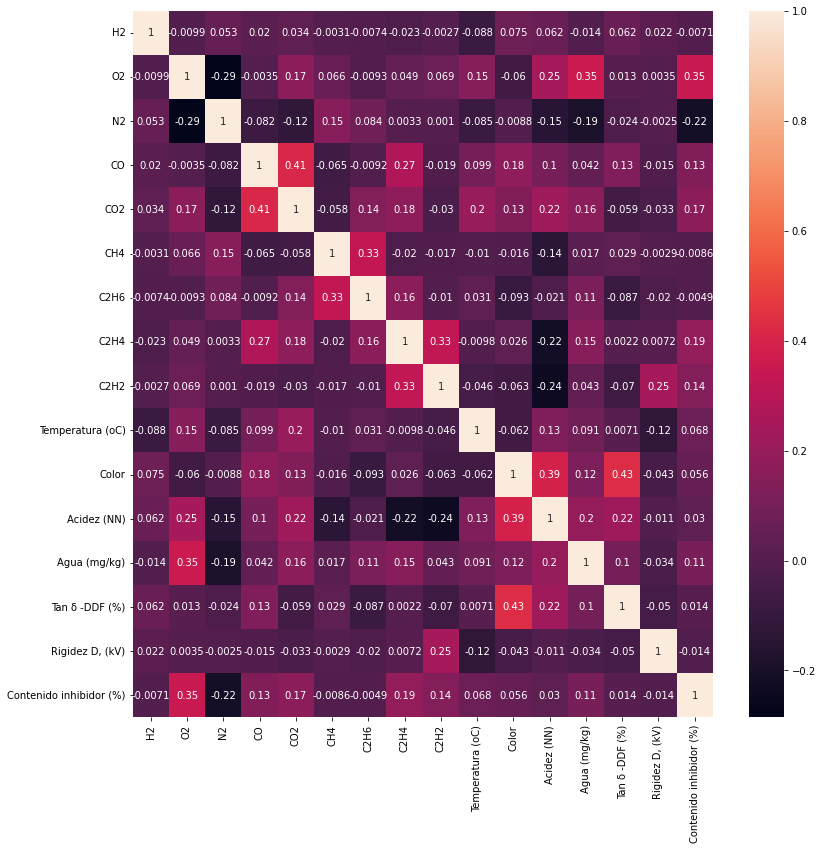

In [20]:
plt.figure(figsize=(13,13))
sns.heatmap(dataset.corr(), annot = True)

### Feature Engineering. (Part 2)

In [21]:
ID = [82626, 83591, 8026, 69514, 21443, 103506, 83711, 53413, 62476, 51150, 79098, 62388, 61755, 82389, 112197, 100770,
69166, 80518, 62472, 4679956, 30085, 30088, 4495, 27100, 100780, 116765, 61606, 61948, 61936, 1364, 61622, 
81677, 51453, 21756, 11664, 26902, 44934, 60645]

AGE = {'82626': 1974, '83591': 1977, '8026': 1966, '69514': 2005, '21443':1954, '103506': 1992, '83711': 1977, '53413': 1963, 
'62476': 1988, '51150': 1992, '79098': 1970, '62388': 1984, '61755': 1970, '82389': 1974, '112197': 1997, '100770': 1977,
'69166':1967, '80518':1971,'62472': 1987, '4679956': 1956, '30085':1957, '30088':1957, '4495':1958, '27100':1968,
'100780':1976, '116765':1999, '61606':1966, '61948': 1974, '61936':1973, '1364':1969, '61622':1967,
'81677':1973, '51453':1962, '21756':1981, '11664':1971, '26902':1976, '44934':1965, '60645':1974}

# print(len(ID))
# print(len(AGE))

In [23]:
dataset.reset_index(inplace = True)
# Se añade el ID a cada transformador
n=0
for ind, num in enumerate(dataset['index']):
    if num == 0:
        dataset['index'][ind] = ID[n]
        if ind > 1:
            n += 1
    else:
        dataset['index'][ind] = ID[n]

# Tranformamos la variable a datetime y sacamos la edad del transformador y su vida útil aproximada 
# a partir de la premisa, 'de que esa es la edad del tranformador más longebo que aparece en nuestro Dataset'
dataset['Fecha'] = pd.to_datetime(dataset['Fecha'], format = '%m/%Y' )
dataset['Age'] = dataset['Fecha'].dt.year 

columnas = []

for t in range(len(dataset['Age'])):
    resta = dataset['Age'][t] - AGE[str(dataset['index'][t])]
    columnas.append(resta)

dataset['Age'] = columnas
dataset['Life expectation'] = 65 - dataset['Age']

C:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [24]:
dataset.columns = ['ID', 'Fecha', 'H2', 'O2', 'N2', 'CO', 'CO2', 'CH4', 'C2H6', 'C2H4', 'C2H2',
       'Temperatura', 'Color', 'Acidez (NN)', 'Water content',
       'Tan δ -DDF (%)', 'Dielectric rigidity', 'Contenido inhibidor (%)',
       'Action', 'Age', 'Life expectation']

In [25]:
dataset = dataset[['H2', 'O2', 'N2', 'CH4', 'CO', 'CO2', 'C2H4', 'C2H6', 'C2H2', 'Dielectric rigidity', 'Water content', 'Life expectation']]

In [26]:
df_test = dataset.copy()

df_test['R1'] = df_test['CH4'] / df_test['H2']
df_test['R2'] = df_test['C2H2'] / df_test['C2H4']
df_test['R3'] = df_test['C2H2'] / df_test['CH4']
df_test['R4'] = df_test['C2H6'] / df_test['C2H2']
df_test['R5'] = df_test['C2H4'] / df_test['C2H6']
df_test['R6'] = df_test['CO2'] / df_test['CO']

df_test.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test.replace(np.nan, 0, inplace=True)

In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   H2                   285 non-null    float64
 1   O2                   285 non-null    float64
 2   N2                   285 non-null    float64
 3   CH4                  285 non-null    float64
 4   CO                   285 non-null    float64
 5   CO2                  285 non-null    int64  
 6   C2H4                 285 non-null    float64
 7   C2H6                 285 non-null    float64
 8   C2H2                 285 non-null    float64
 9   Dielectric rigidity  285 non-null    float64
 10  Water content        285 non-null    int64  
 11  Life expectation     285 non-null    int64  
 12  R1                   285 non-null    float64
 13  R2                   285 non-null    float64
 14  R3                   285 non-null    float64
 15  R4                   285 non-null    flo

In [30]:
# Save 'TEST' data.
df_test.to_csv('test.csv')

<AxesSubplot:>

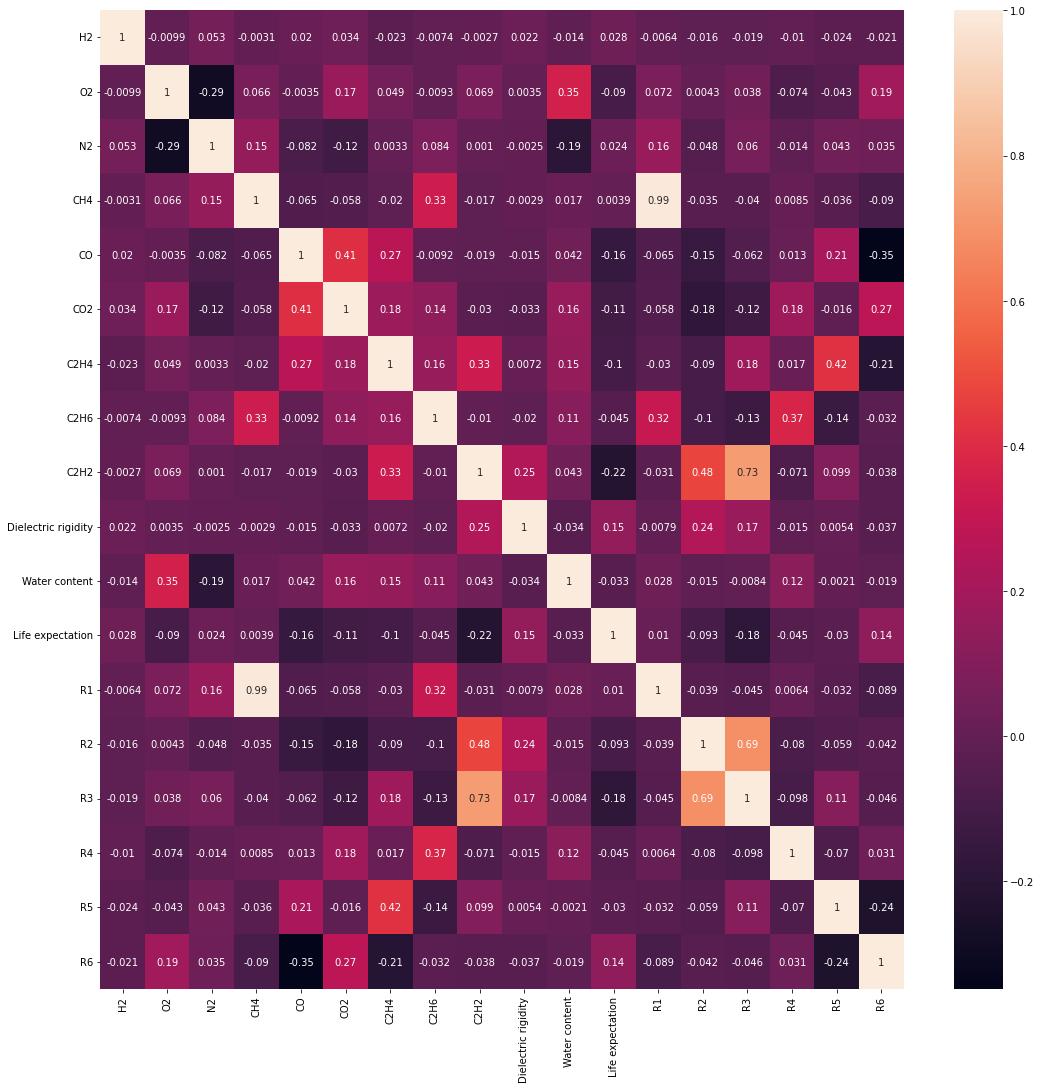

In [31]:
plt.figure(figsize=(18,18))
sns.heatmap(df_test.corr(), annot = True)